In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path

In [ ]:
project_root = Path().resolve().parents[1]

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))




C:\Users\melis\OneDrive\Desktop\logiOps360


In [25]:
from utils.db_utils import connect_db

In [26]:
engine = connect_db()

df_data = pd.read_sql("SELECT * FROM clean_supply_chain_data", engine)
df_problem = pd.read_sql("SELECT * FROM clean_supply_chain_problem", engine)

df_data.columns = df_data.columns.str.lower().str.strip()
df_problem.columns = df_problem.columns.str.lower().str.strip()

revenue_per_product = df_data.groupby('product_type')['revenue_generated'].sum().sort_values(ascending=False)
avg_availability = df_data.groupby('product_type')['availability'].mean().round(2)
avg_lead_time = df_data['lead_times'].mean()
order_sell_ratio = (df_data['order_quantities'] / df_data['number_of_products_sold']).mean().round(2)

ship_late = df_problem[df_problem['ship_late_day_count'] > 0]
ship_ahead = df_problem[df_problem['ship_ahead_day_count'] > 0]
late_rate = round(len(ship_late) / len(df_problem) * 100, 2)
ahead_rate = round(len(ship_ahead) / len(df_problem) * 100, 2)
avg_delay = df_problem['ship_late_day_count'].mean()

volume_by_carrier = df_problem.groupby('carrier')['unit_quantity'].sum().sort_values(ascending=False)
weight_by_origin = df_problem.groupby('origin_port')['weight'].sum().sort_values(ascending=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Commandes/Analysis/revenue_per_product.png'

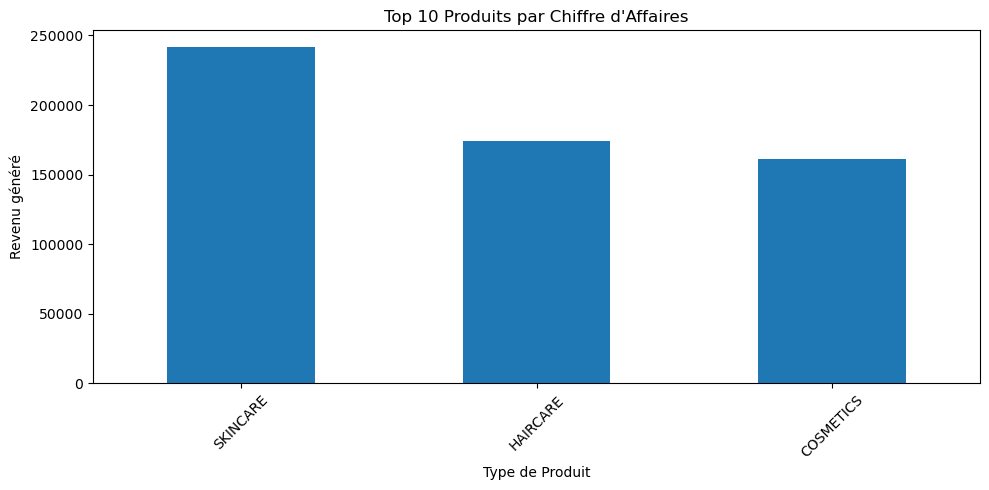

In [ ]:
plt.figure(figsize=(10, 5))
revenue_per_product.head(10).plot(kind='bar')
plt.title("Top 10 Produits par Chiffre d'Affaires")
plt.xlabel("Type de Produit")
plt.ylabel("Revenu généré")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenue_per_product.png")
plt.close()

plt.figure(figsize=(10, 5))
avg_availability.head(10).plot(kind='barh')
plt.title("Disponibilité Moyenne par Type de Produit")
plt.xlabel("Taux de disponibilité")
plt.ylabel("Type de produit")
plt.tight_layout()
plt.savefig("availability_per_product.png")
plt.close()

plt.figure(figsize=(6, 6))
plt.pie([late_rate, ahead_rate, 100 - late_rate - ahead_rate],
        labels=["En retard", "En avance", "À l'heure"],
        autopct='%1.1f%%', startangle=140)
plt.title("Répartition des livraisons")
plt.tight_layout()
plt.savefig("delivery_status_pie.png")
plt.close()

plt.figure(figsize=(10, 5))
volume_by_carrier.head(10).plot(kind='bar')
plt.title("Volume transporté par transporteur")
plt.xlabel("Transporteur")
plt.ylabel("Unités transportées")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("volume_by_carrier.png")
plt.close()

plt.figure(figsize=(10, 5))
weight_by_origin.head(10).plot(kind='barh')
plt.title("Poids expédié par port d'origine")
plt.xlabel("Poids total")
plt.ylabel("Port d'origine")
plt.tight_layout()
plt.savefig("weight_by_origin.png")
plt.close()
